In [1]:
import pandas as pd
import numpy as np 

df = pd.read_csv('2025-04-avon-and-somerset-stop-and-search.csv')

#show information about the dataset
df.info()

# Count total rows in dataset
print(f"\nTotal rows: {len(df)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Type                                      569 non-null    object 
 1   Date                                      569 non-null    object 
 2   Part of a policing operation              0 non-null      float64
 3   Policing operation                        0 non-null      float64
 4   Latitude                                  472 non-null    float64
 5   Longitude                                 472 non-null    float64
 6   Gender                                    546 non-null    object 
 7   Age range                                 511 non-null    object 
 8   Self-defined ethnicity                    469 non-null    object 
 9   Officer-defined ethnicity                 468 non-null    object 
 10  Legislation                           

In [2]:
# # Count missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())

# # Count empty strings per column in case they have just ""
print("\nEmpty string values per column:")
print((df == "").sum())



Missing values per column:
Type                                          0
Date                                          0
Part of a policing operation                569
Policing operation                          569
Latitude                                     97
Longitude                                    97
Gender                                       23
Age range                                    58
Self-defined ethnicity                      100
Officer-defined ethnicity                   101
Legislation                                  38
Object of search                             40
Outcome                                      44
Outcome linked to object of search          392
Removal of more than just outer clothing     60
dtype: int64

Empty string values per column:
Type                                        0
Date                                        0
Part of a policing operation                0
Policing operation                          0
Latitude              

## Data Quality Assessment

- The dataset contains 569 rows and 15 columns.
- Using `df.info()`, we found several columns with missing values, most notably:
  - 'Part of a policing operation' and 'Policing operation' are completely empty.
  - Columns like 'Latitude', 'Longitude', 'Gender', and 'Ethnicity' have partial missing values.

- We also checked for empty strings using `(df == "").sum()` and found **no empty strings** in any columns.
- This means missing data is only due to `NaN` values.
- Based on this,  will drop these columns that are fully empty and decide how to handle partial missing values in other columns during cleaning.


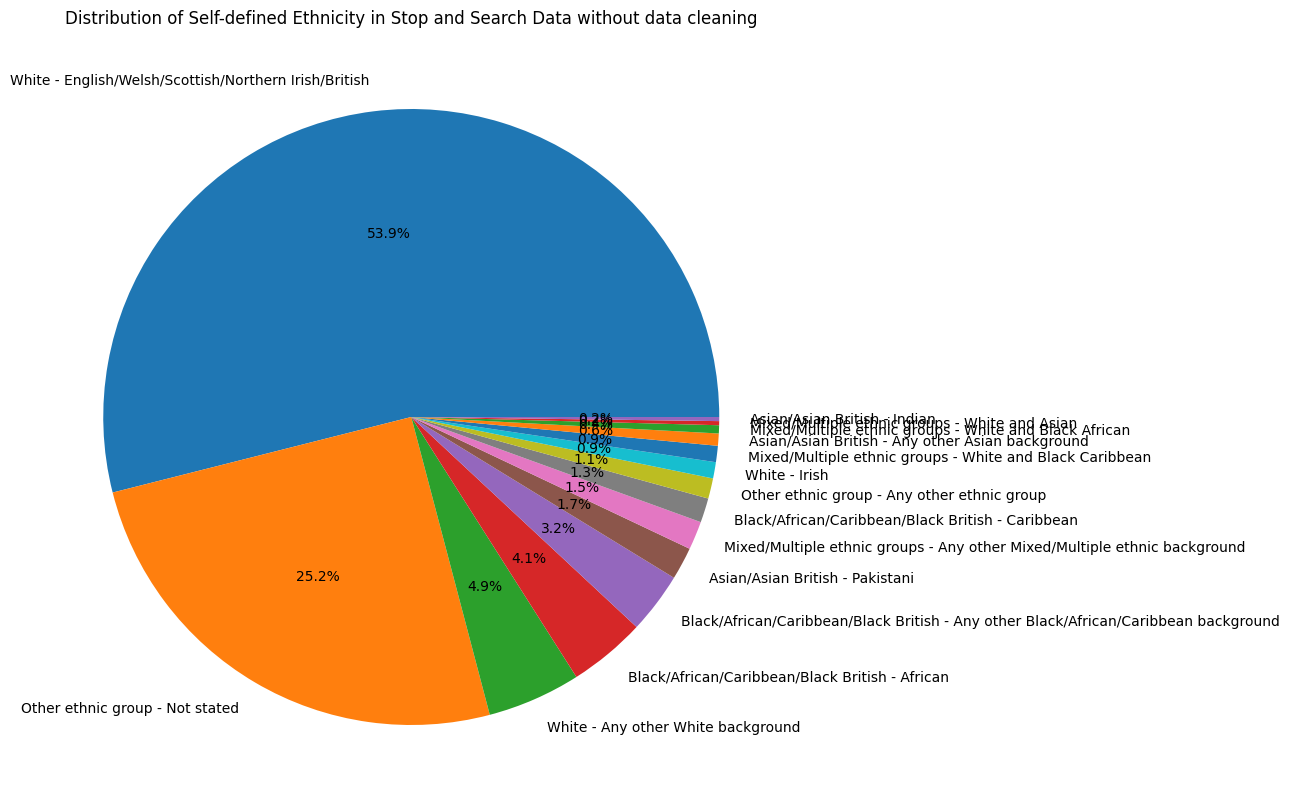

In [3]:
# display pie chart of types in Self-defined ethnicity
import matplotlib.pyplot as plt
# Count occurrences of each type in 'Self
sizes= df['Self-defined ethnicity'].value_counts()
#replace NaN with 'Unknown' for better visualization
# .plot(kind='pie', autopct='%1.1f%%')

fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(sizes, autopct='%1.1f%%',labels=sizes.index)


plt.title('Distribution of Self-defined Ethnicity in Stop and Search Data without data cleaning')
plt.show() 

# this is without the unknowns

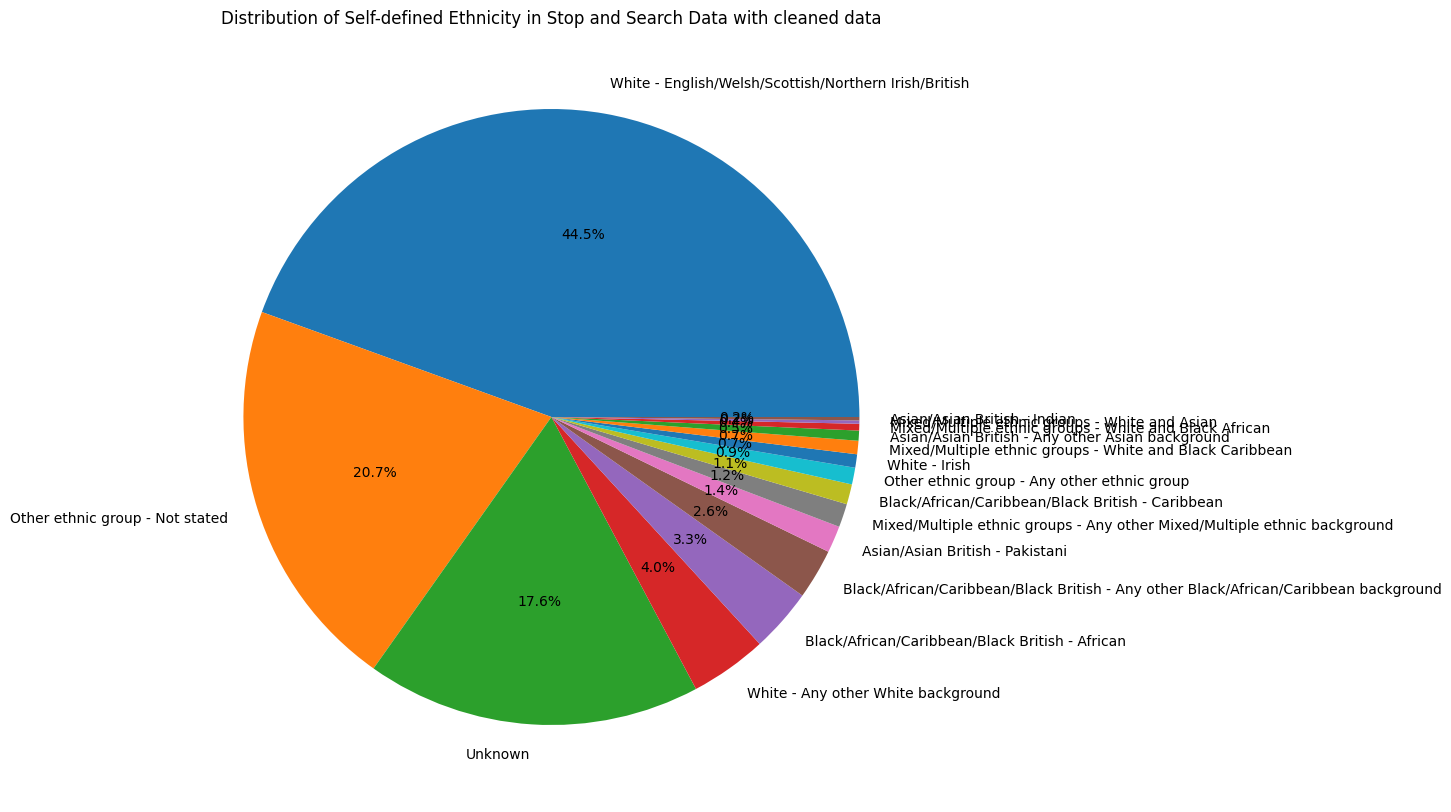

In [4]:
# display pie chart of types in Self-defined ethnicity
import matplotlib.pyplot as plt
# Count occurrences of each type in 'Self
df1 = df['Self-defined ethnicity'].fillna('Unknown')
sizes= df1.value_counts()
#replace NaN with 'Unknown' for better visualization
# .plot(kind='pie', autopct='%1.1f%%')

fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(sizes, autopct='%1.1f%%',labels=sizes.index)


plt.title('Distribution of Self-defined Ethnicity in Stop and Search Data with cleaned data')
plt.show() 


### Two pie charts were generated:

- Excludes missing values (only non-null ethnicities).

- Includes 'Unknown' by replacing NaN with 'Unknown'.

### Key Observations:
 - 'Unknown' is a significant portion of the dataset when included (over 17%).

 - Excluding 'Unknown' can distort proportions and lead to misleading conclusions about known ethnic groups.

 - Including 'Unknown' provides a more accurate picture of the dataset’s completeness and real-world recording limitations

- **Keep `Officer-defined ethnicity`** for further analysis, as it has nearly the same number of non-null entries as `Self-defined ethnicity`.
- **Replace missing values with `'Unknown'`** in appropriate **categorical columns**, such as:
  - `Gender`
  - `Age range`
  - `Self-defined ethnicity`
  - `Officer-defined ethnicity`
  - `Legislation`
  - `Object of search`
  - `Outcome`
- **Do not replace missing values** in **numeric/location-based columns**, such as:
  - `Latitude`
  - `Longitude`  

  **Leave them as empty**

In [5]:
#drop columns 'Part of a policing operation and Policing operation'2024-03-avon-and-somerset-stop-and-search.csv
df = df.drop(columns=['Part of a policing operation', 'Policing operation'])


In [6]:
# Detect rows with more than 10 missing values
mostly_empty_rows = df[df.isnull().sum(axis=1) > 5]

# Display them as a table 
mostly_empty_rows

,Type,Date,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
16,Person search,2025-04-02T16:08:34+00:00,NaN,NaN,Male,10-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,Vehicle search,2025-04-04T00:00:00+00:00,50.907837,-3.481139,NaN,NaN,NaN,NaN,NaN,Controlled drugs,A no further action disposal,False,NaN
31,Vehicle search,2025-04-04T00:00:00+00:00,51.527387,-2.595717,NaN,NaN,NaN,NaN,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,NaN,True,NaN
43,Vehicle search,2025-04-05T00:00:00+00:00,51.049678,-2.778607,NaN,NaN,NaN,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
44,Vehicle search,2025-04-05T00:00:00+00:00,50.942983,-2.632780,NaN,NaN,NaN,NaN,Police and Criminal Evidence Act 1984 (section 1),NaN,NaN,True,NaN
51,Person search,2025-04-05T04:47:21+00:00,NaN,NaN,Male,over 34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,Person search,2025-04-07T16:50:04+00:00,NaN,NaN,Male,over 34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,Person search,2025-04-08T05:22:50+00:00,NaN,NaN,Female,18-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,Person search,2025-04-08T07:38:36+00:00,NaN,NaN,Male,25-34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,Person search,2025-04-09T00:03:20+00:00,NaN,NaN,Male,18-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Drop rows that are missing nearly all key fields (e.g., Gender, Age range, Ethnicity, Outcome, Legislation).
- This helps focus analysis on records that provide meaningful information while keeping enough data for robust insights

## Extra analysis using charts to see types:


ValueError: unconverted data remains when parsing with format "%y%m%d": "-04-01T01:15:00+00:00", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

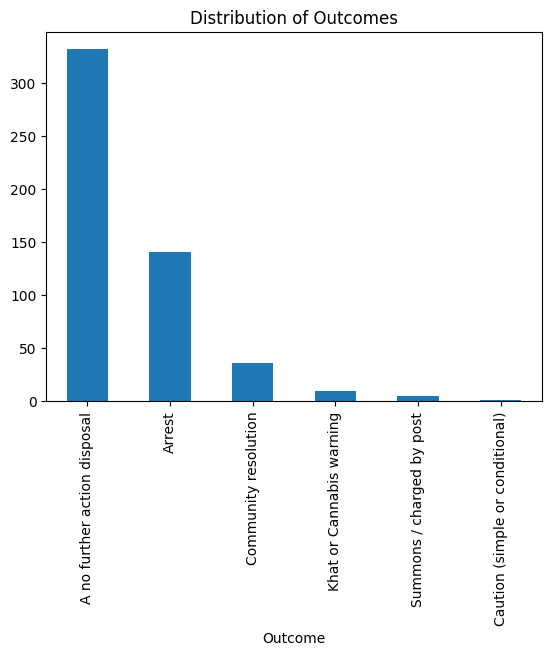

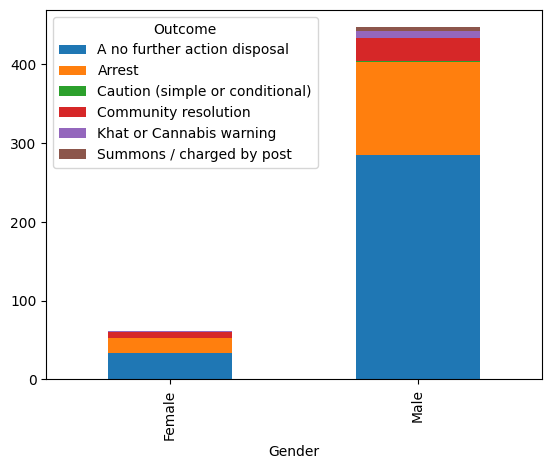

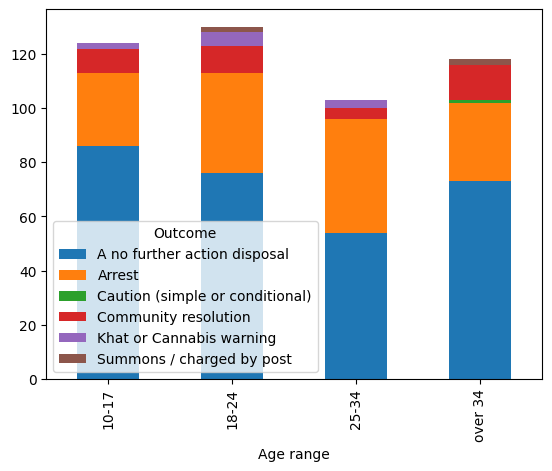

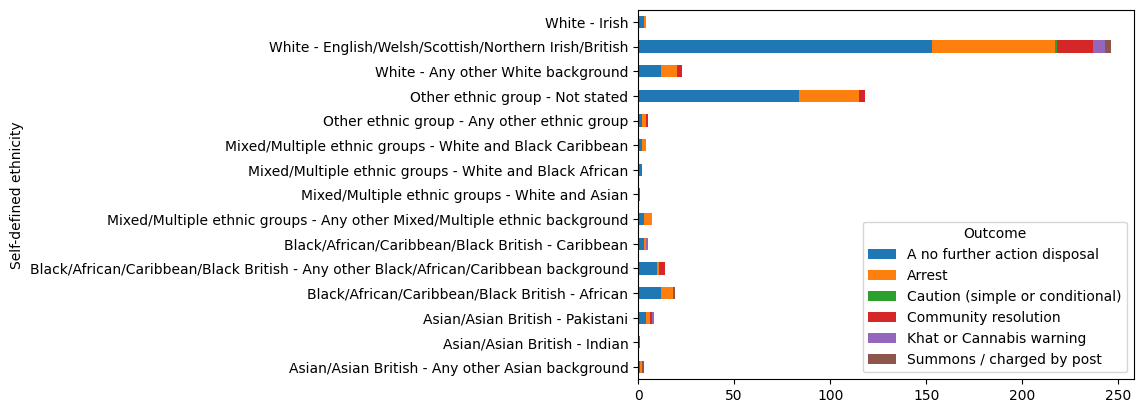

In [7]:
df['Outcome'].value_counts().plot(kind='bar', title='Distribution of Outcomes')

pd.crosstab(df['Gender'], df['Outcome']).plot(kind='bar', stacked=True)
pd.crosstab(df['Age range'], df['Outcome']).plot(kind='bar', stacked=True)
pd.crosstab(df['Self-defined ethnicity'], df['Outcome']).plot(kind='barh', stacked=True)

df['Date'] = pd.to_datetime(df['Date'], format='%y%m%d')
df['Date'].dt.date.value_counts().sort_index().plot(kind='line', title='Searches Over Time')



In [ ]:
import folium

df_map = df.dropna(subset=['Latitude', 'Longitude']) # Ensure no NaN values in coordinates

map = folium.Map(location=[df_map['Latitude'].mean(), df_map['Longitude'].mean()], zoom_start=10)
for i, row in df.iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']],radius=3,popup=row["Type"]).add_to(map)

map

## Conclusion??

Shows that cities are more heavily dense !

Bristol has the highest number of recorded stop-and-search locations in the region, and these are concentrated in densely populated urban neighborhoods, particularly:

- City Centre (Broadmead, Cabot Circus, Stokes Croft)
- St Paul’s & Montpelier
- Easton & Lawrence Hill
- Southville & Bedminster
- Redland, Cotham & Clifton

These are urban areas highly populated and are low-income areas meaning more likely to have higher police presence and linked to more stop-and-search.

Additionally the areas above have  large ethnic minority populations , which begs the question are these areas targeted disportioanlly because of race.

It shows it is best to keep the coordinates even if some are missing to give more of a background to help use it as evidence. 

This analysis supports the development of a dashboard to further explore trends in the dataset for this month and across other months if needed.

